**Machine Learning for Heart Disease Diagnosis**

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Logistic Regression

Model Training

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


Model Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Precision
precision = precision_score(Y_test, X_test_prediction)

# Recall
recall = recall_score(Y_test, X_test_prediction)

# F1 Score
f1 = f1_score(Y_test, X_test_prediction)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)
print('Confusion Matrix:')
print(conf_matrix)



Precision:  0.84375
Recall:  0.8181818181818182
F1 Score:  0.8307692307692308
Confusion Matrix:
[[23  5]
 [ 6 27]]


Plots

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


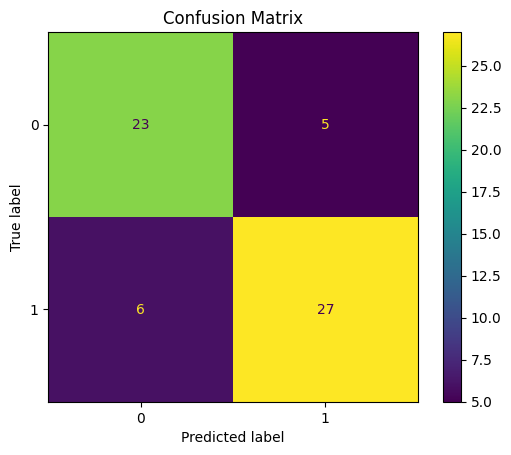

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plot_confusion_matrix(model, X_test, Y_test, display_labels=model.classes_)
plt.title('Confusion Matrix')
plt.show()


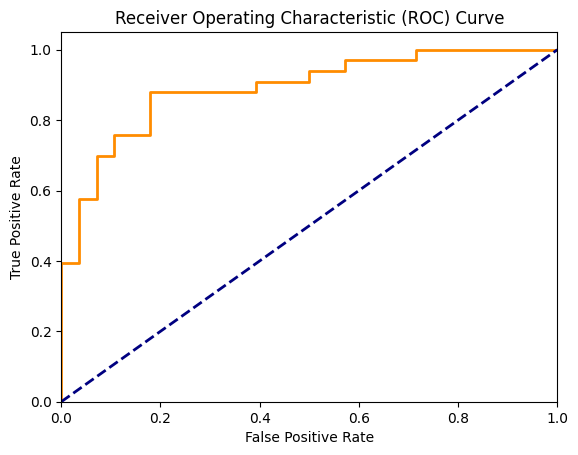

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# # AUC Curve
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


KNN

Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, Y_train)

# Predictions on training data
X_train_prediction_knn = knn_model.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)

# Predictions on test data
X_test_prediction_knn = knn_model.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)


Accuracy Scores

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy_knn)

Accuracy on Training data :  0.78099173553719


In [ ]:
print('Accuracy on Test data : ', test_data_accuracy_knn)

Accuracy on Test data :  0.6229508196721312


Model Evaluation & Plots

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precision:  0.6470588235294118
Recall:  0.6666666666666666
F1 Score:  0.6567164179104478
Confusion Matrix:
[[16 12]
 [11 22]]


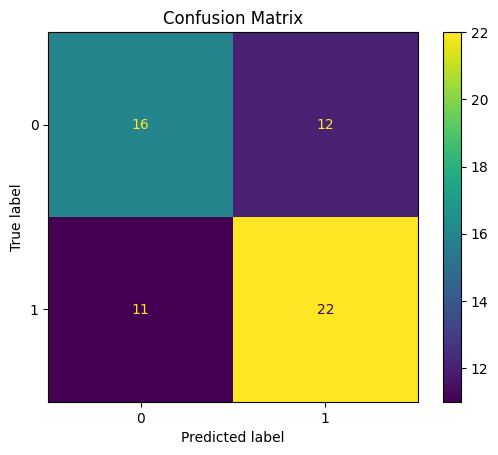

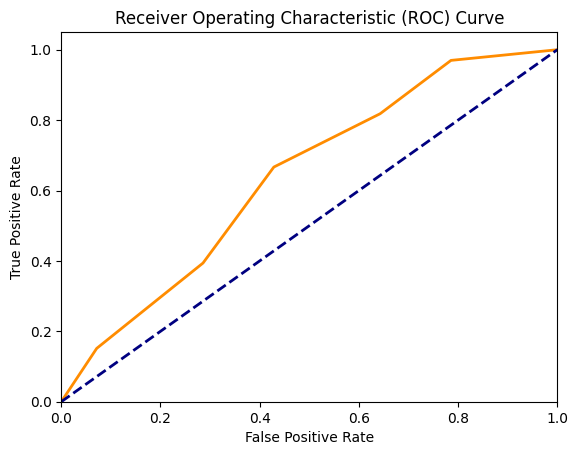

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Precision
precision = precision_score(Y_test, X_test_prediction_knn)

# Recall
recall = recall_score(Y_test, X_test_prediction_knn)

# F1 Score
f1 = f1_score(Y_test, X_test_prediction_knn)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction_knn)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)
print('Confusion Matrix:')
print(conf_matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plot_confusion_matrix(knn_model, X_test, Y_test, display_labels=model.classes_)
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
y_probs = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

GAUSSIAN NAIVE BAYES

Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create GNB model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, Y_train)

# Predictions on training data
X_train_prediction_gnb = gnb_model.predict(X_train)
training_data_accuracy_gnb = accuracy_score(X_train_prediction_gnb, Y_train)

# Predictions on test data
X_test_prediction_gnb = gnb_model.predict(X_test)
test_data_accuracy_gnb = accuracy_score(X_test_prediction_gnb, Y_test)


Accuracy Scores

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy_gnb)

Accuracy on Training data :  0.8471074380165289


In [ ]:
print('Accuracy on Test data : ', test_data_accuracy_gnb)

Accuracy on Test data :  0.819672131147541


Model Evaluation & Plots

Precision:  0.8928571428571429
Recall:  0.7575757575757576
F1 Score:  0.819672131147541
Confusion Matrix:
[[25  3]
 [ 8 25]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


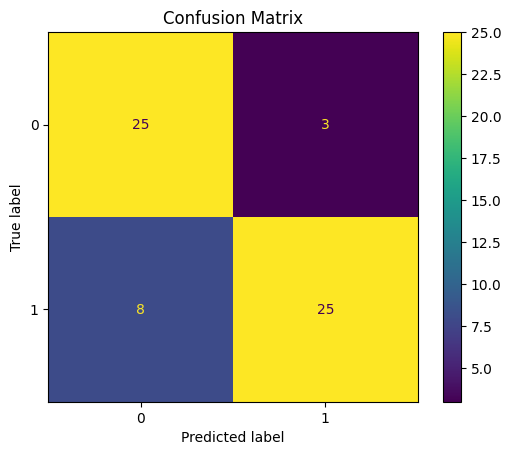

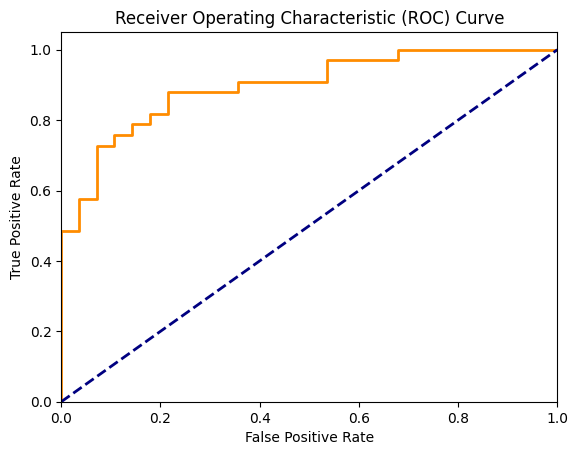

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Precision
precision = precision_score(Y_test, X_test_prediction_gnb)

# Recall
recall = recall_score(Y_test, X_test_prediction_gnb)

# F1 Score
f1 = f1_score(Y_test, X_test_prediction_gnb)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction_gnb)

print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)
print('Confusion Matrix:')
print(conf_matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plot_confusion_matrix(gnb_model, X_test, Y_test, display_labels=model.classes_)
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
y_probs = gnb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

ENSEMBLE LEARNING(VOTING CLASSIFIER)

Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Hyperparameter tuning for Logistic Regression
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5)
logistic_grid.fit(X_train, Y_train)
best_logistic_model = logistic_grid.best_estimator_

# Train Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, Y_train)

# Create Random Forest model
rf_model = RandomForestClassifier()

# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, Y_train)
best_rf_model = rf_grid.best_estimator_

# Create a voting classifier with the best models
voting_classifier = VotingClassifier(estimators=[
    ('logistic', best_logistic_model),
    ('naive_bayes', naive_bayes_model),
    ('random_forest', best_rf_model)
], voting='soft')  # Soft voting for probabilities

# Fit the voting classifier
voting_classifier.fit(X_train, Y_train)

# Predict using the trained model on test data
test_data_accuracy_combined = voting_classifier.score(X_test, Y_test)

print("Test data accuracy with the combined model:", test_data_accuracy_combined)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test data accuracy with the combined model: 0.8688524590163934


Model Evaluatino & Plots

Accuracy: 0.8688524590163934
Precision: 0.9032258064516129
Recall: 0.8484848484848485
F1-score: 0.875
Confusion Matrix:
[[25  3]
 [ 5 28]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


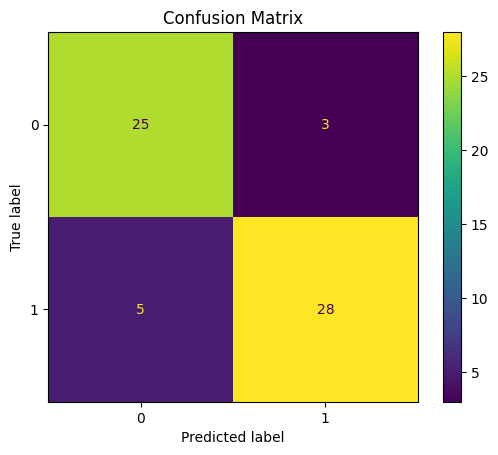

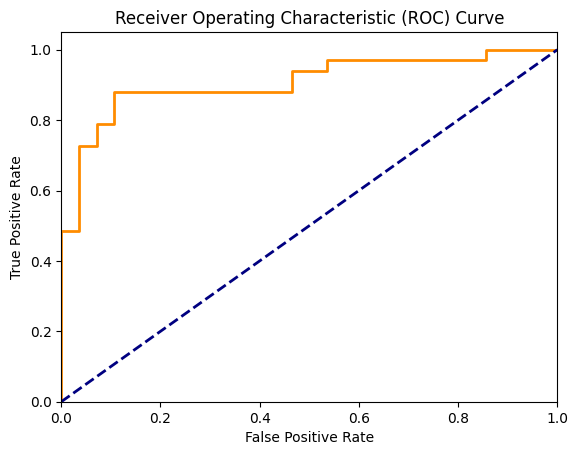

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict using the trained model on test data
predictions = voting_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, predictions)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, predictions)
print("Recall:", recall)

# F1-score
f1 = f1_score(Y_test, predictions)
print("F1-score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plot_confusion_matrix(voting_classifier, X_test, Y_test, display_labels=voting_classifier.classes_)
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
y_probs = voting_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
